#I. Perkenalan
Nama: Hafidz Muta'ali

Batch: FTDS 006

---



Video Games Rating By 'ESRB':

Predict the ESRB rating for games based on the content that the game rated on.

Data Description:
* This data contains the name for 1895 games with 34 of ESRB rating content with the name and console as features for each game.

* A single data point is represented as a binary value 0-1 for Console and a binary vector for the features of ESRB content.

Feature | Type | Description | Keys
--- | --- | --- | --- |
title	| string |	Name of the game. | ----
console |	int	| The console on which the game was released. |	0 = PS4 , 1 = PS4 & Xbox_one
Alcohol_Reference |	int |	Reference to and/or images of alcoholic beverages.|	0 = no, 1 = yes
Animated_Blood |	int |	Discolored and/or unrealistic depictions of blood.|	0 = no, 1 = yes
Blood	| int |	Depictions of blood.	| 0 = no, 1 = yes
BloodandGore |	int |	Depictions of blood or the mutilation of body parts.|	 0 = no, 1 = yes
Cartoon_Violence |	int |	Violent actions involving cartoon-like situations and characters. |	0 = no, 1 = yes
Crude_Humor |	int |	Depictions or dialogue involving vulgar antics, including "bathroom" humor.| 	0 = no, 1 = yes
DrugRe_ference |	int	| Reference to and/or images of illegal drugs. |	0 = no, 1 = yes
Fantasy_Violence|	int|	Violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life.|	0 = no, 1 = yes
Intense_Violence |	int |	Graphic and realistic-looking depictions of physical conflict. May involve extreme and/or realistic blood, gore, weapons, and depictions of human injury and death. |	0 = no, 1 = yes
Language |	int |	Moderate use of profanity.	0 = no, 1 = yes
Lyrics |	int |	References to profanity, sexuality, violence, alcohol, or drug use in music.|	0 = no, 1 = yes
Mature_Humor	| int |	Depictions or dialogue involving "adult" humor, including sexual references.	|0 = no, 1 = yes
Mild_Blood	|int	|Some blood.|	0 = no, 1 = yes
MildCartoonViolence	|int|	Some violent actions involving cartoon.|	0 = no, 1 = yes
MildFantasyViolence	|int|	Some violent actions of a fantasy nature.|	0 = no, 1 = yes
Mild_Language	|int|	Mild to moderate use of profanity.	|0 = no, 1 = yes
Mild_Lyrics	|int|	Mild References to profanity, sexuality, violence, alcohol, or drug use in music.|	0 = no, 1 = yes
MildSuggestiveThemes	|int|	some provocative references or materials|	0 = no, 1 = yes
Mild_Violence	|int|	Some scenes involving aggressive conflict.	0 = no, 1 = yes
No_Descriptors	|int|	No content descriptors. |	0 = no, 1 = yes
Nudity	|int|	Graphic or prolonged depictions of nudity.|	0 = no, 1 = yes
Partial_Nudity |	int|	Brief and/or mild depictions of nudity.	|0 = no, 1 = yes
Sexual_Content	|int|	Non-explicit depictions of sexual behavior, possibly including partial nudity.|	0 = no, 1 = yes
Sexual_Themes	|int|	References to sex or sexuality.|	0 = no, 1 = yes
Simulated_Gambling	|int|	Player can gamble without betting or wagering real cash or currency.	|0 = no, 1 = yes
Strong_Language	|int|	Explicit and/or frequent use of profanity.|	0 = no, 1 = yes
StrongSexualContent	|int|	Explicit and/or frequent depictions of sexual behavior, possibly including nudity.|	0 = no, 1 = yes
Suggestive_Themes	|int|	Provocative references or materials.|	0 = no, 1 = yes
UseofAlcohol	|int|	The consumption of alcoholic beverages.	0 = no, 1 = yes
UseofDrugsandAlcohol |int|	The consumption of alcoholic and drugs beverages.	|0 = no, 1 = yes
Violence	|int|	Scenes involving aggressive conflict. May contain bloodless dismemberment.|	0 = no, 1 = yes
ESRB_rating	|string|	rating: E - ET - T - M |	 E , ET , T , M 


ESRB rating description:

ESRB_rating |	Description |
---|---|
E	| Everyone
ET	| Early Teen 10+
T	| Teen 13+
M	| Mature 17+

#II. Import Libraries

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

#III. Data Loading

In [438]:
dfraw = pd.read_csv('/content/Video_games_esrb_rating.csv')
pd.set_option('display.max_columns', None)
test = pd.read_csv('/content/test_esrb.csv')
dfraw

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T


#IV. Data Cleaning

In [439]:
dfraw.shape

(1895, 34)

In [440]:
dfraw.info() #Check Tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [441]:
#Check Missing Values
dfraw.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [442]:
#Check Duplicate
dfraw.duplicated().sum()

0

In [443]:
# Checking the unique values of categorical columns
for column in dfraw.columns:
    print(column)
    print(dfraw[column].unique())
    print('\n')

title
['Monster Jam Steel Titans 2' 'Subnautica: Below Zero'
 'NIER REPLICANT VER.1.22474487139…' ... 'SPARC' 'Still Time'
 'Surf World Series']


console
[1 0]


alcohol_reference
[0 1]


animated_blood
[0 1]


blood
[0 1]


blood_and_gore
[0 1]


cartoon_violence
[0 1]


crude_humor
[0 1]


drug_reference
[0 1]


fantasy_violence
[0 1]


intense_violence
[0 1]


language
[0 1]


lyrics
[0 1]


mature_humor
[0 1]


mild_blood
[0 1]


mild_cartoon_violence
[0 1]


mild_fantasy_violence
[0 1]


mild_language
[0 1]


mild_lyrics
[0 1]


mild_suggestive_themes
[0 1]


mild_violence
[0 1]


no_descriptors
[1 0]


nudity
[0 1]


partial_nudity
[0 1]


sexual_content
[0 1]


sexual_themes
[0 1]


simulated_gambling
[0 1]


strong_janguage
[0 1]


strong_sexual_content
[0 1]


suggestive_themes
[0 1]


use_of_alcohol
[0 1]


use_of_drugs_and_alcohol
[0 1]


violence
[0 1]


esrb_rating
['E' 'ET' 'M' 'T']




In [444]:
dfraw.rename({'strong_janguage': 'strong_language'}, axis=1, inplace=True)
test.rename({'strong_janguage': 'strong_language'}, axis=1, inplace=True)
dfraw

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T


In [445]:
# Menghapus kolom Title dan console 
dfraw = dfraw.drop(['title','console'], axis = 1)

test = test.drop(['title','console'], axis = 1)
dfraw.head()

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,T


In [446]:
# Mengubah value dari target menjadi numerikal
dfraw['esrb_rating'] = dfraw['esrb_rating'].replace({'E': 0, 'ET':1, 'T':2, 'M':3})
test['esrb_rating'] = test['esrb_rating'].replace({'E': 0, 'ET':1, 'T':2, 'M':3})

In [447]:
dfclean = dfraw.copy()

#V.EDA

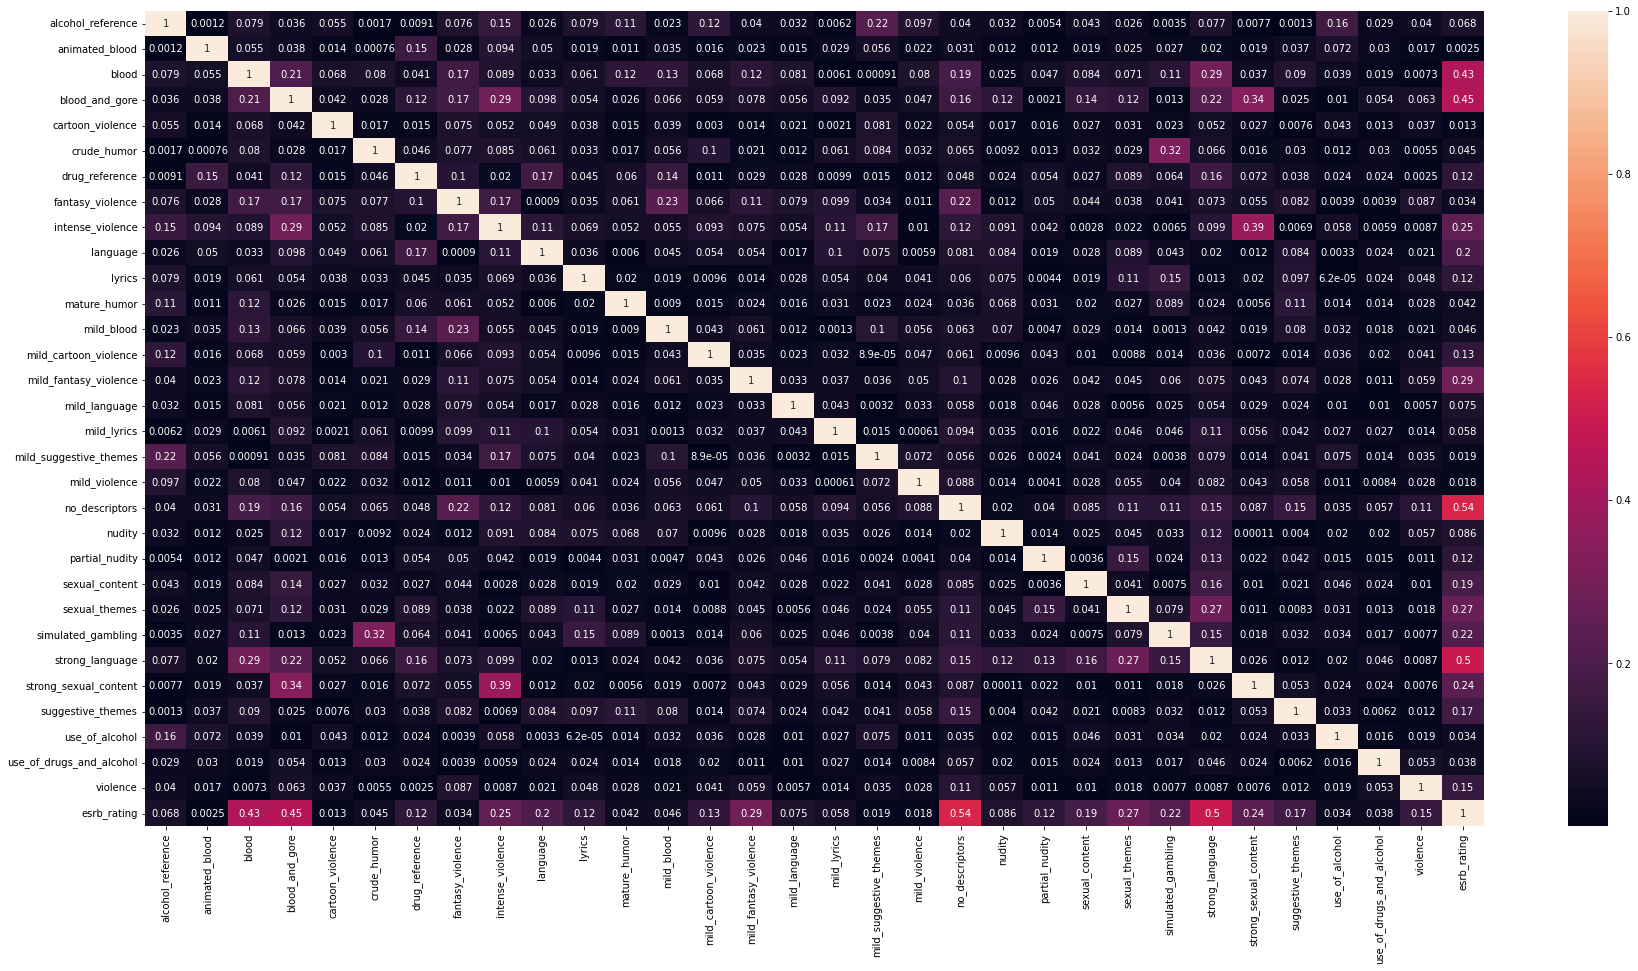

In [407]:
#heatmap untuk pengecekan correlation
plt.figure(figsize=(30, 15))
sns.heatmap(dfclean.corr().abs(),  annot=True)
plt.show()

Melihat dari korelasi antar kolom terhadap kolom esrb_rating, maka akan di drop beberapa fitur yang nilai korelasi nya dibawah 0.10

In [449]:
dfclean = dfclean.drop(['alcohol_reference'	,'animated_blood', 'cartoon_violence','lyrics',	'crude_humor', 'fantasy_violence', 'mature_humor',	'mild_blood',
                        'mild_language',	'mild_lyrics',	'mild_suggestive_themes',	'mild_violence', 'nudity', 'use_of_alcohol',	'use_of_drugs_and_alcohol'], axis = 1)

In [448]:
test = test.drop(['alcohol_reference'	,'animated_blood', 'cartoon_violence',	'lyrics',	'crude_humor', 'fantasy_violence', 'mature_humor',	'mild_blood',
                        'mild_language',	'mild_lyrics',	'mild_suggestive_themes',	'mild_violence', 'nudity', 'use_of_alcohol',	'use_of_drugs_and_alcohol'], axis = 1)

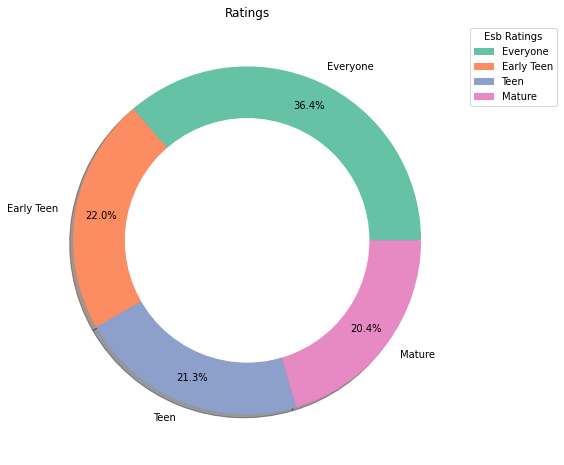

In [371]:
sizes = dict(dfclean['esrb_rating'].value_counts())
palet= sns.color_palette('Set2')
Label= ['Everyone', 'Early Teen', 'Teen', 'Mature']
plt.figure(figsize=(12, 8))
plt.title("Ratings")
plt.pie(sizes.values(), labels=Label, autopct="%.1f%%", pctdistance=0.85, shadow=True, colors=palet)
plt.legend(title="Esb Ratings", labels=Label, bbox_to_anchor=(1, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Jika dilihat distribusi dari target bisa dikatakan normal(merata)

#VI. Data Preprocessing

In [450]:
#Train data
X_train = dfclean.drop('esrb_rating', axis = 1) #Fitur
y_train = dfclean['esrb_rating'] #Target

#test data
X_test = test.drop('esrb_rating', axis = 1) #Fitur
y_test = test['esrb_rating'] #Target

In [451]:
scaler = Pipeline([('scaler', MinMaxScaler())])

In [452]:
X_train = scaler.fit_transform(X_train)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [453]:
X_test = scaler.fit_transform(X_test)
X_test

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

#VII. Pendefisian Model

##Logistic Regression

In [454]:
lgr=LogisticRegression(random_state=42)

In [455]:
model_lgr = lgr.fit(X_train,y_train)

##Random Forest

In [456]:
dfclean.columns

Index(['blood', 'blood_and_gore', 'drug_reference', 'intense_violence',
       'language', 'mild_cartoon_violence', 'mild_fantasy_violence',
       'no_descriptors', 'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_language', 'strong_sexual_content',
       'suggestive_themes', 'violence', 'esrb_rating'],
      dtype='object')

In [457]:
rf = RandomForestClassifier(random_state=42)

In [458]:
model_rf = rf.fit(X_train,y_train)

##SVM

In [460]:
svm = SVC(random_state=42)

In [461]:
model_svm = svm.fit(X_train,y_train)

#VIII. Model Improvement

##Logistic Regression

In [462]:
params = {
    'C': [0.01, 0.1, 0.5],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}


lr_search = GridSearchCV(lgr, params, cv = 5, scoring = 'accuracy', return_train_score=True)
%time lr_search.fit(X_train, y_train)

CPU times: user 750 ms, sys: 2.71 ms, total: 753 ms
Wall time: 755 ms


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 0.5], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             return_train_score=True, scoring='accuracy')

In [463]:
print("Best score accuracy: {:.2f}".format(lr_search.best_score_))
print("Best parameters: {}".format(lr_search.best_params_))

Best score accuracy: 0.81
Best parameters: {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}


In [464]:
lr_best= lr_search.best_estimator_
lr_best

LogisticRegression(C=0.5, random_state=42)

##Random Forest

In [465]:
params = {
    'criterion':['gini','entropy'],
    'max_depth': [5, 15, 25],
    'min_samples_split': [2, 45],
    'min_samples_leaf' : [5, 25],
    'n_estimators': [50, 100, 200]
}



rf_search = GridSearchCV(rf, params, cv = 5, scoring = 'accuracy', return_train_score=True)
%time rf_search.fit(X_train, y_train)

CPU times: user 1min 23s, sys: 437 ms, total: 1min 23s
Wall time: 1min 23s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 15, 25], 'min_samples_leaf': [5, 25],
                         'min_samples_split': [2, 45],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [466]:
print("Best score accuracy: {:.2f}".format(rf_search.best_score_))
print("Best parameters: {}".format(rf_search.best_params_))

Best score accuracy: 0.81
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 45, 'n_estimators': 200}


In [467]:
rf_best= rf_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=45,
                       n_estimators=200, random_state=42)

##SVM

In [468]:
params = {
    'C': [0.5, 1.0],
    'kernel':['rbf','linear'],
    'decision_function_shape': ['ovr', 'ovo']
}

svm_search = GridSearchCV(svm, params, cv = 5, scoring = 'accuracy', return_train_score=True)
%time svm_search.fit(X_train, y_train)

CPU times: user 4.11 s, sys: 10.8 ms, total: 4.12 s
Wall time: 4.1 s


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.5, 1.0],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='accuracy')

In [469]:
print("Best score accuracy: {:.2f}".format(svm_search.best_score_))
print("Best parameters: {}".format(svm_search.best_params_))

Best score accuracy: 0.82
Best parameters: {'C': 1.0, 'decision_function_shape': 'ovr', 'kernel': 'rbf'}


In [470]:
svm_best= svm_search.best_estimator_
svm_best

SVC(random_state=42)

#IX Model Evaluation

##Train

In [471]:
print('1. Logistic Regression:')
print(classification_report(y_train, model_lgr.predict(X_train)))
print('--------------------------------------------------\n')
print('2. Logistic Regression Best Param:')
print(classification_report(y_train, lr_best.predict(X_train)))
print('--------------------------------------------------\n')

print('3. Random Forest:')
print(classification_report(y_train, model_rf.predict(X_train)))
print('--------------------------------------------------\n')
print('4. Random Forest Best Param:')
print(classification_report(y_train, rf_best.predict(X_train)))
print('--------------------------------------------------\n')

print('5. SVM:')
print(classification_report(y_train, model_svm.predict(X_train)))
print('--------------------------------------------------\n')
print('6. SVM Best Param:')
print(classification_report(y_train, svm_best.predict(X_train)))
print('--------------------------------------------------\n')

1. Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       416
           1       0.68      0.81      0.74       403
           2       0.82      0.77      0.80       689
           3       0.87      0.85      0.86       387

    accuracy                           0.82      1895
   macro avg       0.83      0.83      0.83      1895
weighted avg       0.83      0.82      0.82      1895

--------------------------------------------------

2. Logistic Regression Best Param:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       416
           1       0.68      0.80      0.73       403
           2       0.82      0.78      0.80       689
           3       0.88      0.84      0.86       387

    accuracy                           0.82      1895
   macro avg       0.83      0.82      0.82      1895
weighted avg       0.82      0.82      0.82      1895

-------------------

##Test


In [472]:
print('1. Logistic Regression:')
print(classification_report(y_test, model_lgr.predict(X_test)))
print('--------------------------------------------------\n')
print('2. Logistic Regression Best Param:')
print(classification_report(y_test, lr_best.predict(X_test)))
print('--------------------------------------------------\n')

print('3. Random Forest:')
print(classification_report(y_test, model_rf.predict(X_test)))
print('--------------------------------------------------\n')
print('4. Random Forest Best Param:')
print(classification_report(y_test, rf_best.predict(X_test)))
print('--------------------------------------------------\n')

print('5. SVM:')
print(classification_report(y_test, model_svm.predict(X_test)))
print('--------------------------------------------------\n')
print('6. SVM Best Param:')
print(classification_report(y_test, svm_best.predict(X_test)))
print('--------------------------------------------------\n')

1. Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       100
           1       0.69      0.88      0.77       126
           2       0.73      0.79      0.76       184
           3       0.84      0.54      0.66        90

    accuracy                           0.76       500
   macro avg       0.80      0.74      0.75       500
weighted avg       0.78      0.76      0.76       500

--------------------------------------------------

2. Logistic Regression Best Param:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       100
           1       0.69      0.88      0.77       126
           2       0.72      0.79      0.75       184
           3       0.84      0.52      0.64        90

    accuracy                           0.76       500
   macro avg       0.79      0.74      0.75       500
weighted avg       0.77      0.76      0.75       500

-------------------

#X. Model Inference

##Save Model

In [486]:
dfclean.head()

,blood,blood_and_gore,drug_reference,intense_violence,language,mild_cartoon_violence,mild_fantasy_violence,no_descriptors,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,violence,esrb_rating
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,3
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2


In [487]:
predictor = Pipeline([
        ("preparation", scaler),
        ("model", svm_best)
    ])

predictor.fit(X_train, y_train)
predictor.predict(X_test)

array([2, 0, 3, 0, 1, 3, 3, 1, 0, 1, 2, 1, 1, 1, 2, 3, 3, 2, 0, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 3, 2, 2, 1, 1, 2, 1, 2, 3, 1, 1, 2, 2, 0, 1, 3,
       0, 0, 2, 1, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 3, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 3, 0, 0, 1, 2, 2, 1, 1, 2, 3, 2,
       1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 3, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       3, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 3, 2, 3, 2, 1, 1, 1, 0, 1, 2,
       0, 0, 1, 3, 2, 2, 1, 1, 1, 0, 3, 1, 3, 1, 1, 2, 3, 1, 2, 2, 3, 0,
       3, 2, 1, 3, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 3, 1,
       1, 2, 0, 0, 3, 2, 2, 1, 1, 0, 1, 3, 3, 3, 0, 2, 2, 0, 3, 0, 2, 1,
       2, 2, 3, 0, 2, 0, 2, 0, 2, 3, 2, 2, 2, 2, 3, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 2, 3, 1, 2, 1, 2, 2, 1, 0, 3, 1, 2, 0, 2, 1, 2, 1, 2, 2, 3,
       1, 2, 2, 1, 2, 3, 0, 2, 0, 3, 2, 2, 1, 1, 3, 1, 3, 1, 1, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 3,

In [488]:
import joblib
joblib.dump(predictor, "my_model.pkl")

['my_model.pkl']

In [489]:
load_model = joblib.load("my_model.pkl")

In [490]:
test[test['esrb_rating']==3]

,blood,blood_and_gore,drug_reference,intense_violence,language,mild_cartoon_violence,mild_fantasy_violence,no_descriptors,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,violence,esrb_rating
5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3
6,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3
15,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,3
16,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3
28,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3
492,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,3
495,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3
496,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3


In [491]:
new_data = [[1, 0,	0,	0,		0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1]]
new_data2=[[1,	1,	1,	1,		0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0]]

In [492]:
result= load_model.predict((new_data))
print("Berdasarkan Input :",new_data)
if(result==0):
  print('Everyone can play it')

elif(result==1):
  print('Game rating is Early Teen, you need to 10+ for play it')

elif(result==2):
  print('Game rating is Teen, you need to 13+ for play it')
else :
  print('Game rating is Mature, you need to 17+ for play it')

Berdasarkan Input : [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
Game rating is Teen, you need to 13+ for play it


In [493]:
result= load_model.predict((new_data2))
print("Berdasarkan Input :",new_data2)
if(result==0):
  print('Everyone can play it')

elif(result==1):
  print('Game rating is Early Teen, you need to 10+ for play it')

elif(result==2):
  print('Game rating is Teen, you need to 13+ for play it')
else :
  print('Game rating is Mature, you need to 17+ for play it')

Berdasarkan Input : [[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]
Game rating is Mature, you need to 17+ for play it


#Kesimpulan

* Model sudah mampu memprediksi Rating games
* Model terbaik yang digunakan adalah SVM dengan parameters: {'C': 1.0, 'decision_function_shape': 'ovr', 'kernel': 'rbf'} dikarenakan hasil precision recall  f1score train sangat baik dan test svm tidak turun begitu jauh  dari pada algoritma random forest dan logisitc regression